# Part I - Prosper Loan Dataset Exploration
## by Ayomide Joseph Adeigbe

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others


## Preliminary Wrangling


In [223]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [181]:
#!conda install -y -n ALX seaborn

> Loading Prosper loan dataset.


In [224]:
loan_df = pd.read_csv('../prosperLoanData.csv', encoding='ISO-8859-1')

In [183]:
# high-level overview of data shape and composition
print(loan_df['ProsperScore'].value_counts())
print(loan_df.shape)
print(loan_df.dtypes)
print(loan_df.head(10))

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64
(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116

In [234]:
# convert IncomeRange, ProsperScore, ProsperRating (numeric), and ProsperRating (Alpha) into ordered categorical types
ordinal_loan_var_dict = {'IncomeRange': ['$100,000+','$75,000-99,999','$50,000-74,999','$25,000-49,999','$1-24,999','$0','Not employed'],
                    'LoanStatus': ['Current','Completed', 'FinalPaymentInProgress','Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Cancelled','Chargedoff','Defaulted'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ],
                    'ProsperRating (numeric)': [7, 6, 5, 4, 3, 2, 1],
                    'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']}

for feature in ordinal_loan_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_loan_var_dict[feature])
    loan_df[feature] = loan_df[feature].astype(ordered_var)

In [236]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   ListingKey                           113937 non-null  object  
 1   ListingNumber                        113937 non-null  int64   
 2   ListingCreationDate                  113937 non-null  object  
 3   CreditGrade                          28953 non-null   object  
 4   Term                                 113937 non-null  int64   
 5   LoanStatus                           113937 non-null  category
 6   ClosedDate                           55089 non-null   object  
 7   BorrowerAPR                          113912 non-null  float64 
 8   BorrowerRate                         113937 non-null  float64 
 9   LenderYield                          113937 non-null  float64 
 10  EstimatedEffectiveYield              84853 non-null   float64 
 11  

### What is the structure of your dataset?

> Presented dataset has 113,937 loan entries for people across different states, occupation and income range. 81 variables were measured on each loan including loan amount, interest rate, debt to income ratio, and many more.

### What is/are the main feature(s) of interest in your dataset?

> It will be fascinating to establish the economic viability of the loan by predicting the exact feature or sets of features that directly influence the interest rate paid on the principal. For example what feature will guarantee or influence a person high or low interest rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> People with low debt to Income ratio, high credit score, fulltime employment status or self-employed with high income, and less open credit lines will likely pay their debt timely. A negation in any of the listed variables might affect a persons ability to honor obligations.

## Univariate Exploration

> What is current distribution or status of Prosper loan? Are there more debtors defaulting than those regularly servicing their obligations?

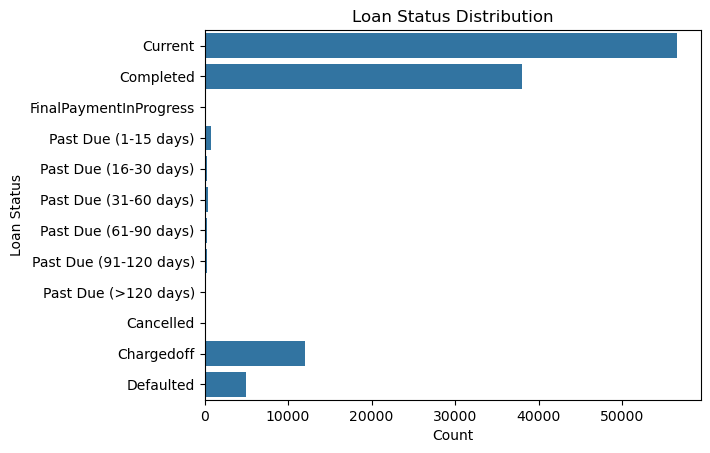

In [248]:
#Bar chart showing Loan Status of the dataset
plot_color = sns.color_palette()[0]
sns.countplot(data = loan_df, y = 'LoanStatus', color = plot_color).set(title='Loan Status Distribution', xlabel='Count', ylabel='Loan Status');


> Obvious observation here is that majority of Prosper loans are currently running and serviced appropriately. Significant percentage of the loans are chargedoff and defaulted, below code will continue to exploratively look at the variable responsible for the loan status.

> But first, let's consider proportion of data that falls into those different loan status category.

In [240]:
total_loans = loan_df.shape[0]
max_loanstatus_count = loan_df['LoanStatus'].value_counts()[0]
max_loanstatus_prop = max_loanstatus_count / total_loans
max_loanstatus_prop

0.4965551137909546

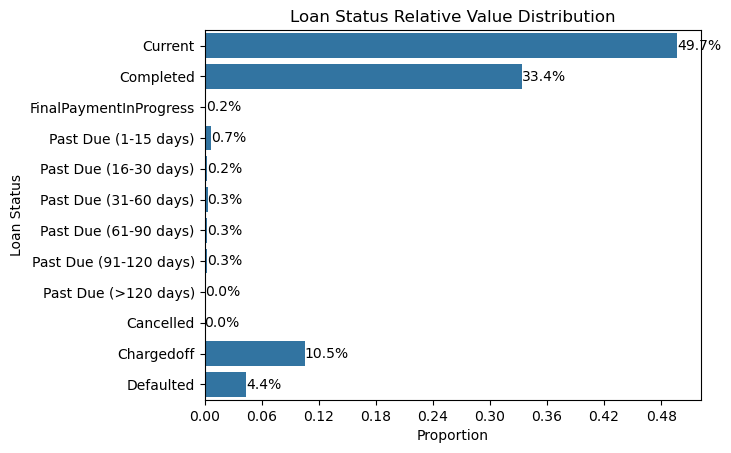

In [250]:
sns.countplot(data = loan_df, y = 'LoanStatus', color = plot_color).set(title='Loan Status Relative Value Distribution', ylabel='Loan Status');
props = np.arange(0, max_loanstatus_prop, 0.06)
labels = ['{:0.2f}'.format(v) for v in props]
plt.xticks(props * total_loans, labels)
plt.xlabel('Proportion')


def relative_value_plot(column_name):
    #compute and plot relative value of chart
    loan_status_count = loan_df[column_name].value_counts(sort=False)
    for i in range(loan_status_count.shape[0]):
        count = loan_status_count[i]
        loan_pct = '{:0.1f}%'.format(100*count/total_loans)
        plt.text(count+1, i, loan_pct, va = 'center');
relative_value_plot('LoanStatus')

> We can say as a matter of fact that 14.9% of booked loans are either chargedoff or defaulted. This level of loss is significant and we need to explore responsible variable further. 

> Next, what is the income distribution of debtors in the Prosper loan dataset, this might help understand the significant number of defaulted/chargedoff loans

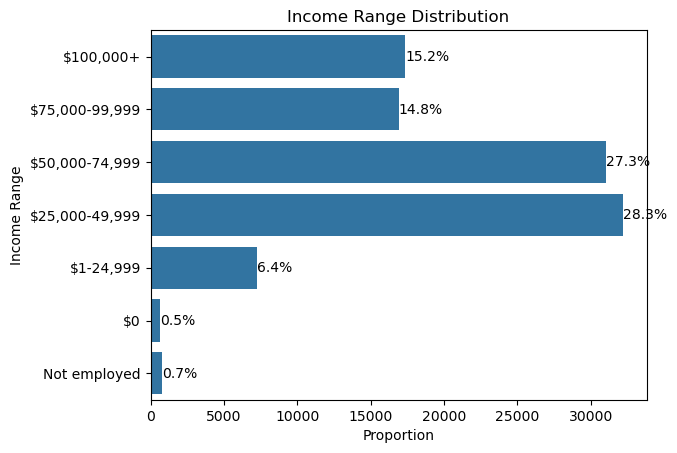

In [294]:
#Bar chart showing Income distribution of the dataset
plot_color = sns.color_palette()[0]
income_range_order = loan_df['IncomeRange'].value_counts().index
sns.countplot(data = loan_df, y = 'IncomeRange', color = plot_color).set(title='Income Range Distribution');
plt.ylabel('Income Range')
plt.xlabel('Proportion')
relative_value_plot('IncomeRange')

> At a glance, we can depict that more than 50% of the loan went to middle income earners

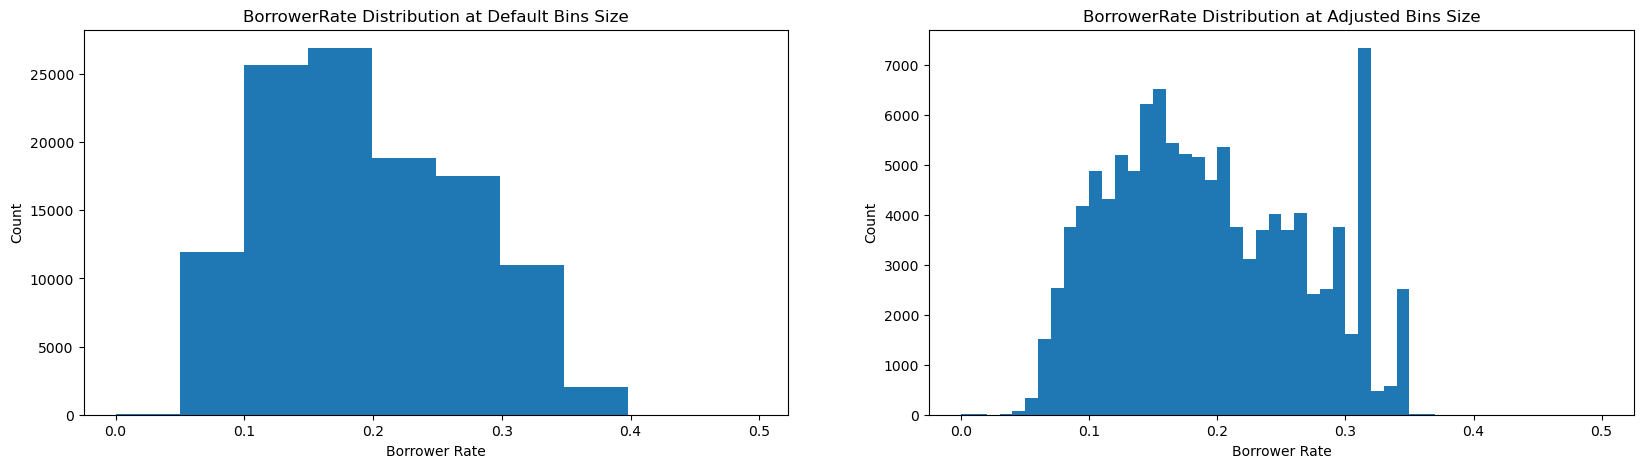

In [256]:
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
plt.title('BorrowerRate Distribution at Default Bins Size')
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
bins = np.arange(0, loan_df['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data =loan_df, x = 'BorrowerRate');

plt.subplot(1,2,2)
plt.title('BorrowerRate Distribution at Adjusted Bins Size')
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
bins = np.arange(0, loan_df['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data =loan_df, x = 'BorrowerRate', bins=bins);

> Above histogram attempt to explore the significant of 'BorrowerRate' which is the interest rate of the loan. The histogram on the left give a false depiction of the data but when better scaled as on the right histogram, we observe a partially right-skewed distribution.

> Can loan amount issued to people be responsible for the current bad loans?

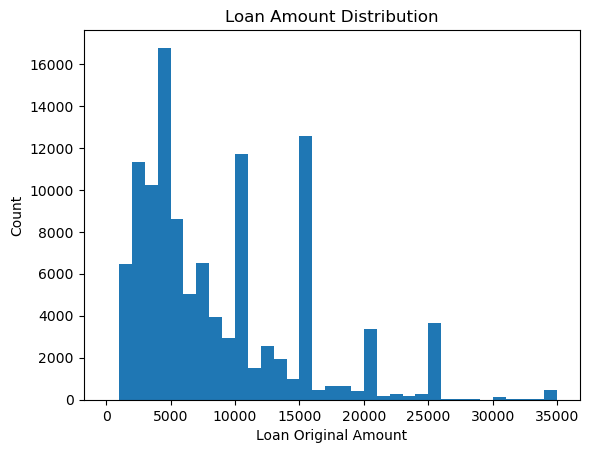

In [258]:
bins = np.arange(0, loan_df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data =loan_df, x = 'LoanOriginalAmount', bins=bins);
#plt.figure(figsize = [15,5])
plt.title('Loan Amount Distribution')
plt.ylabel('Count')
plt.xlabel('Loan Original Amount');


> In the histogram above, we observed that majority of loans from Prosper are less than USD10,000 which is good amount considering the income range distribution observed earlier. 

>Few bins are out of the normal range and I will attempt to investigate a bit further below:

In [97]:
#Investigate income range of people with loan amount exceeding 30000
print(loan_df[loan_df['LoanOriginalAmount']>30000].StatedMonthlyIncome.min())
loan_df[loan_df['LoanOriginalAmount']>30000].IncomeRange.value_counts()

8333.333333


$100,000+         503
$75,000-99,999      0
$50,000-74,999      0
$25,000-49,999      0
$1-24,999           0
$0                  0
Not employed        0
Not displayed       0
Name: IncomeRange, dtype: int64

>Income earlers above USD100,000 only are eligible for loans above USD30,000

> What is the Credit score distribution and how does that affect the current bad loans?

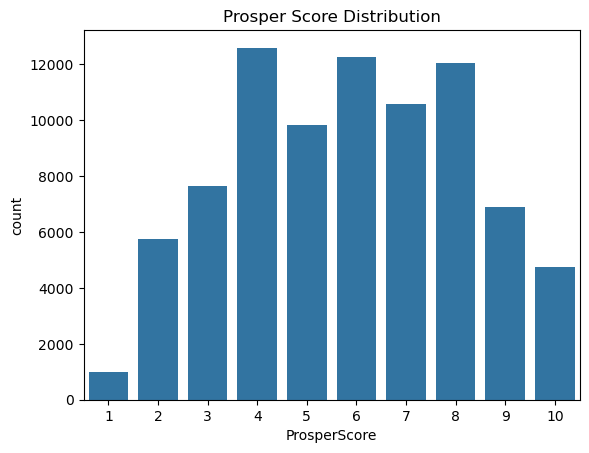

In [293]:
#Examining prosper score distribution of debtors but first removing empty entries from the dataset
plot_color = sns.color_palette()[0]
sns.countplot(data = loan_df[loan_df['ProsperScore'].notnull()], x = 'ProsperScore', color = plot_color).set(title='Prosper Score Distribution');



> Obvious observation here is that risk rating is not a major determining factor for loans accessibility. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Outliers was observed in loan amount distribution. Further investigation revealed that only income earners above USD100,000 can access such loan. This might mean high net-worth individual or people with good political standing in the society.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No unusual distribution so far that requires data wrangling operations.

## Bivariate Exploration

> Is there a relationship between loan interest rate and income of debtors?

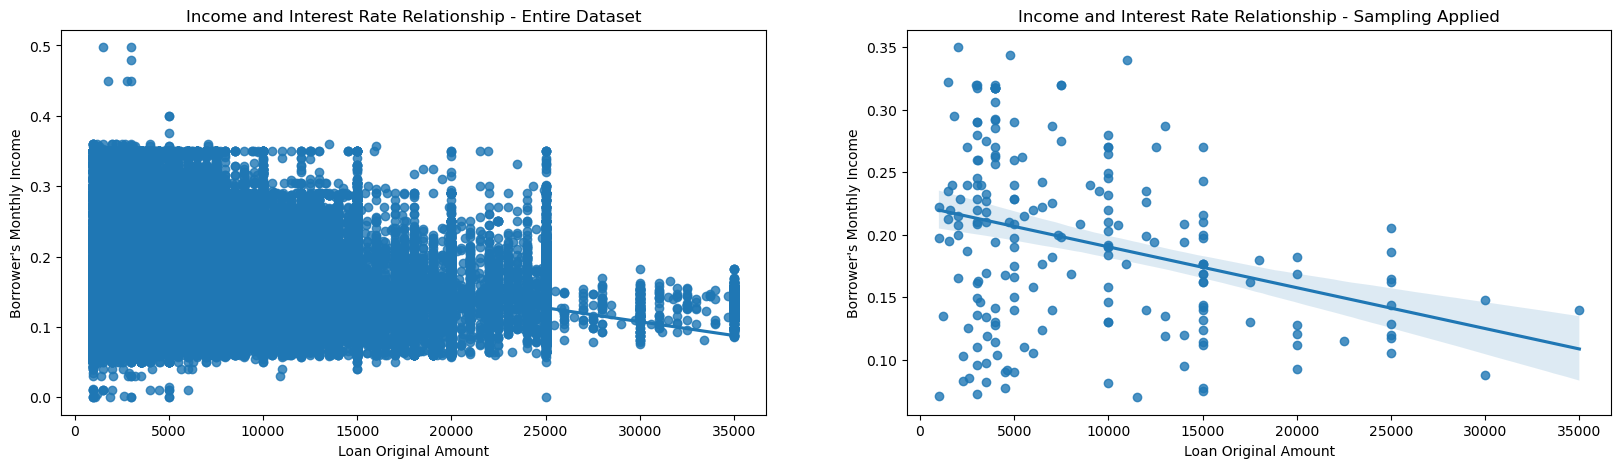

In [262]:
plt.figure(figsize = [20,5])
plt.subplot(1,2,1)
sns.regplot(data=loan_df, y='BorrowerRate', x='LoanOriginalAmount');
plt.title('Income and Interest Rate Relationship - Entire Dataset')
plt.ylabel("Borrower's Monthly Income")
plt.xlabel('Loan Original Amount')

plt.subplot(1,2,2)
np.random.seed(2023)
get_sample = np.random.choice(loan_df.shape[0], 200, replace=False)
loan_df_subset = loan_df.loc[get_sample]
sns.regplot(data=loan_df_subset, y='BorrowerRate', x='LoanOriginalAmount');
plt.title('Income and Interest Rate Relationship - Sampling Applied')
plt.ylabel("Borrower's Monthly Income")
plt.xlabel('Loan Original Amount');

> With sampling applied on the right image above, exploring the distribution is much easier. It is observed that higher interest rates are common with lower loan amount.Which means low income earners or "poor people" tend to pay more on their loans when compared to relatively rich people

> Let's observe the same distribution on a different visualization as below.

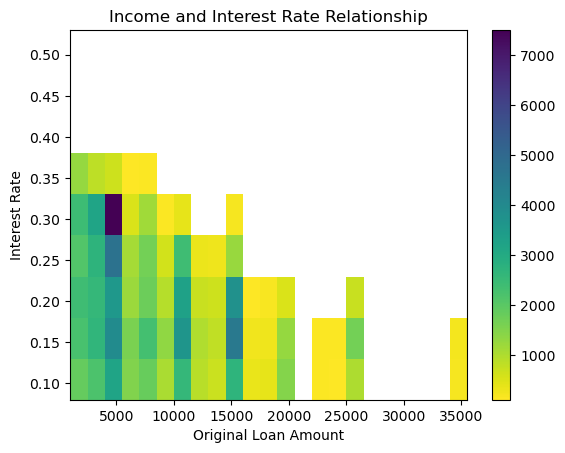

In [264]:
bins_x = np.arange(1000, 35000+1500, 1500)
bins_y = np.arange(0.08, 0.5+0.05, 0.05)
plt.hist2d(data=loan_df, y='BorrowerRate', x='LoanOriginalAmount', cmin=100, cmap='viridis_r', bins=[bins_x, bins_y]);
plt.colorbar()
plt.title('Income and Interest Rate Relationship')
plt.xlabel("Original Loan Amount")
plt.ylabel('Interest Rate');

> The higher the loan amount, the lower the interest paid which means people can secure high loan amounts pay less interest.

> Is there a relationship between loan amount and income of debtors?

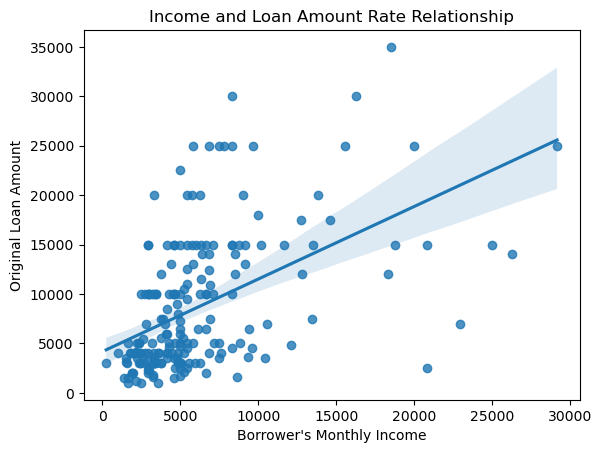

In [265]:
sns.regplot(data=loan_df_subset, y='LoanOriginalAmount', x='StatedMonthlyIncome')
plt.xlabel("Borrower's Monthly Income")
plt.ylabel('Original Loan Amount')
plt.title('Income and Loan Amount Rate Relationship');

> We observe from distribution above that there is a positive relationship between income and the amount of loan accessible. The more more money people make, the more they can borrow with Prosper.

> What about ratings? Does customer ratings affect interest rate paid on loans?

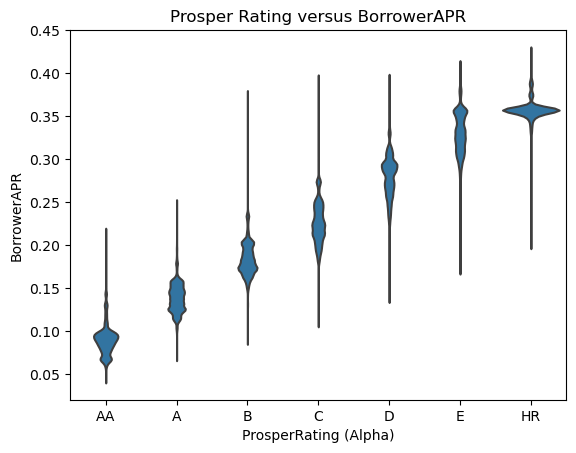

In [292]:
violin_color = sns.color_palette()[0]
sns.violinplot(data=loan_df, x='ProsperRating (Alpha)', y='BorrowerAPR', color=violin_color, inner = None).set(title='Prosper Rating versus BorrowerAPR');

> There appears to be a direct relationship between Prosper rating and borrower's APR. People with poor ratings tend to pay the most interest rate on their loans.

> Box plot is used below to summarize relationship between Prosper rating and Borrower's APR

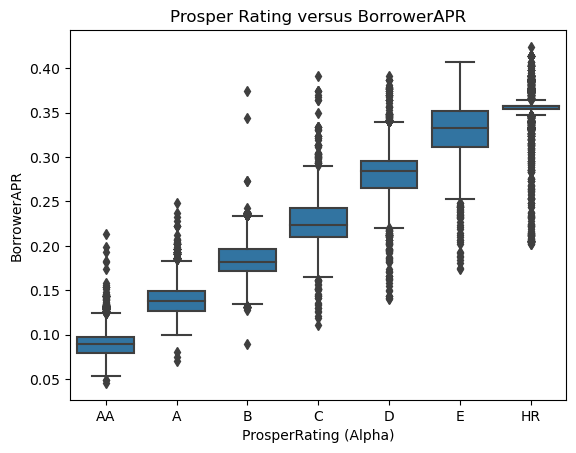

In [291]:
sns.boxplot(data=loan_df, x='ProsperRating (Alpha)', y='BorrowerAPR', color=violin_color).set(title='Prosper Rating versus BorrowerAPR');

> This boxplot supports the previous observation on the relationship between ProsperRating and BorrowerAPR. Quite a number of outliers are also observed on each box which suggests that the present of another variable(s) when determining the interest rate for Prosper loans.

> We have establish that BorrowerAPR is at least directly influenced by Prosper Rating significantly. To get good interest rate on a loan, you need to have good ratings with Prosper.


>So how is Prosper Rating calculated? Could it be based on Income? - Heatmap of both variables/attributes might give an answer


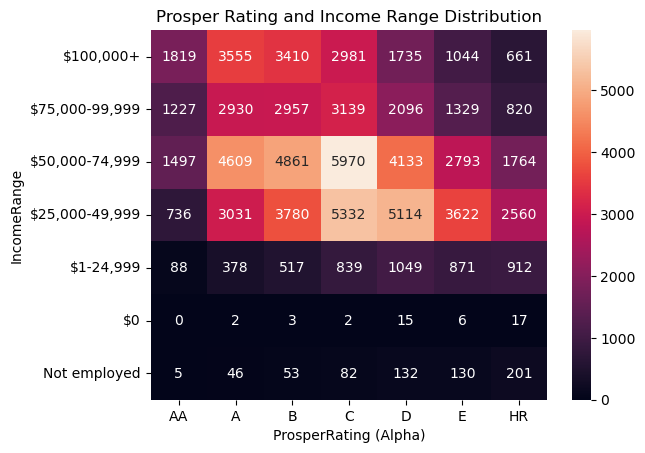

In [270]:
heatmap_data_rearrange = loan_df.groupby(['IncomeRange', 'ProsperRating (Alpha)']).size().reset_index(name='count').pivot(index='IncomeRange', columns='ProsperRating (Alpha)', values='count')

sns.heatmap(heatmap_data_rearrange, annot=True, fmt='d').set(title='Prosper Rating and Income Range Distribution');

> Most loans are given to people with average rating. It is also obvious that peoople with very bad ratings still manage to secure some loans.

>The distribution is observed better on clustered plot as below

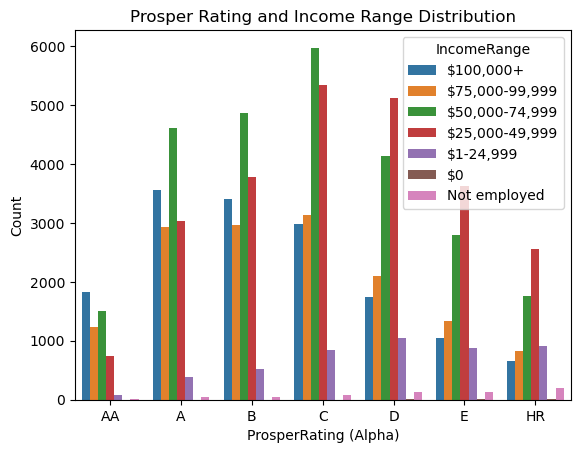

In [280]:
sns.countplot(data = loan_df, x = 'ProsperRating (Alpha)', hue='IncomeRange').set(title='Prosper Rating and Income Range Distribution', ylabel='Count');

> The distribution of ProsperRating across the Income Range is clearer on the clustered plot. There is like a balanced distribution of ratings across Prosper customers.

>It might be more helpful to further explore individual segment using Faceting

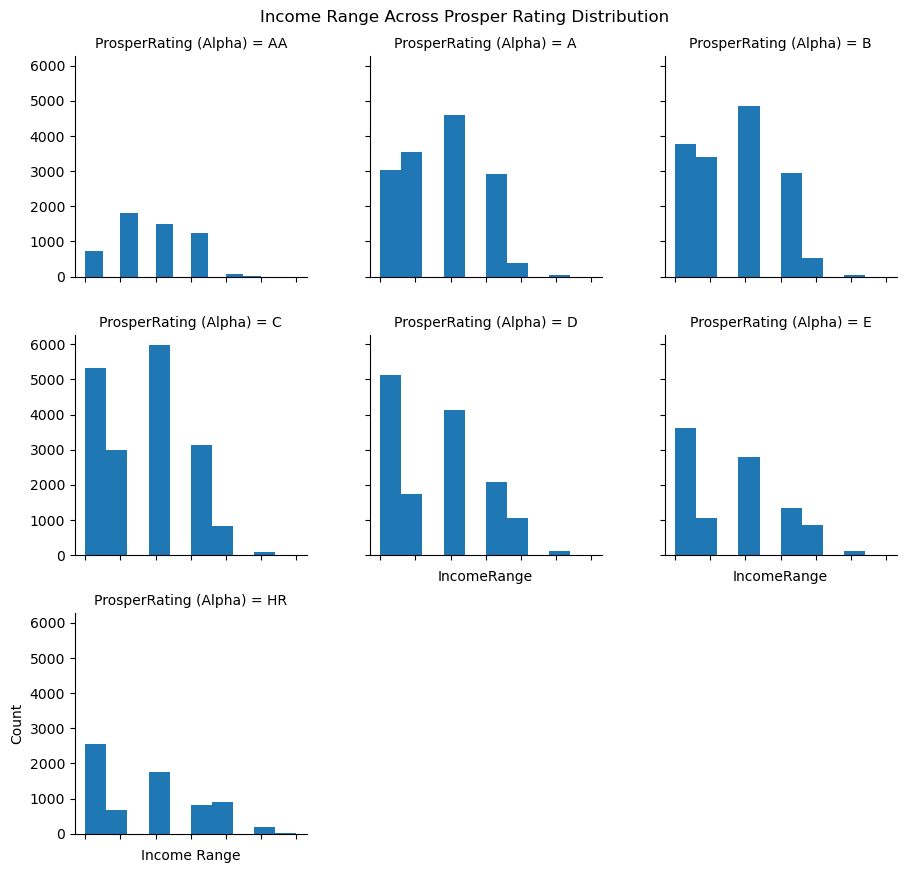

In [284]:
faceting_plot = sns.FacetGrid(data=loan_df, col='ProsperRating (Alpha)', col_wrap =3);
faceting_plot.fig.suptitle('Income Range Across Prosper Rating Distribution')
faceting_plot.map(plt.hist, 'IncomeRange');
faceting_plot.set_xticklabels(rotation=90);
plt.xlabel('Income Range')
plt.ylabel('Count');

> Let's apply faceting to visualize how borrower's rating relate to interest rate and loan amount.

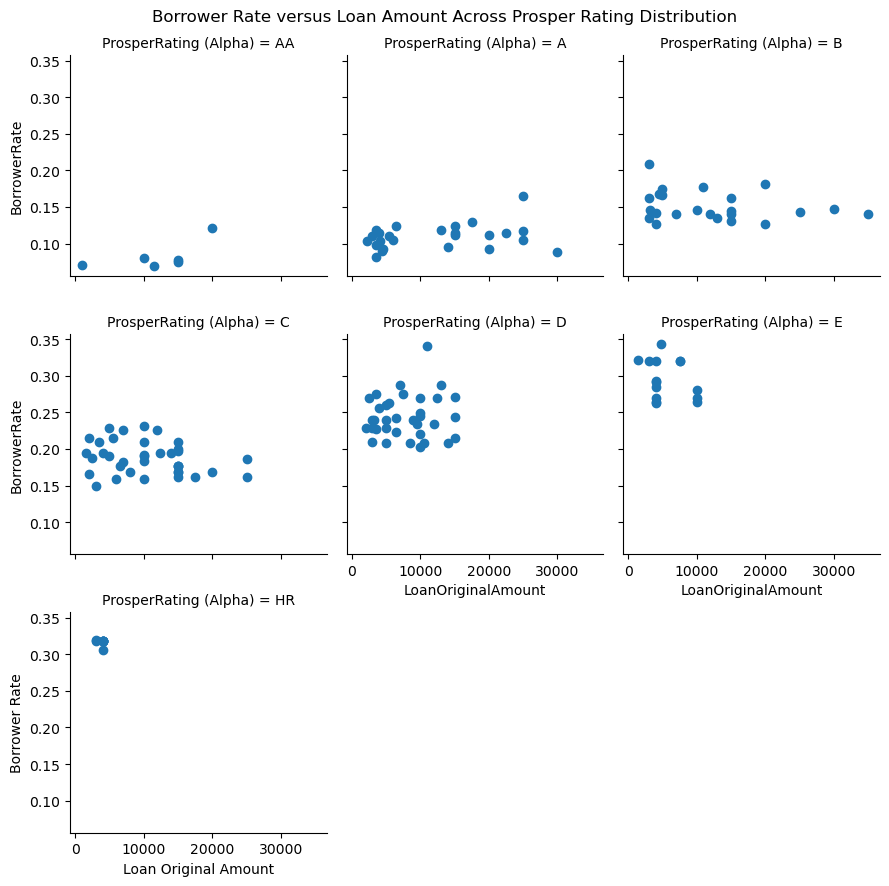

In [285]:
faceting_plot = sns.FacetGrid(data=loan_df_subset, col='ProsperRating (Alpha)', col_wrap=3)
faceting_plot.fig.suptitle('Borrower Rate versus Loan Amount Across Prosper Rating Distribution')
faceting_plot.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate');
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower Rate');

> Below pairgrid observes relationship between different variables in the Prosper loan dataset

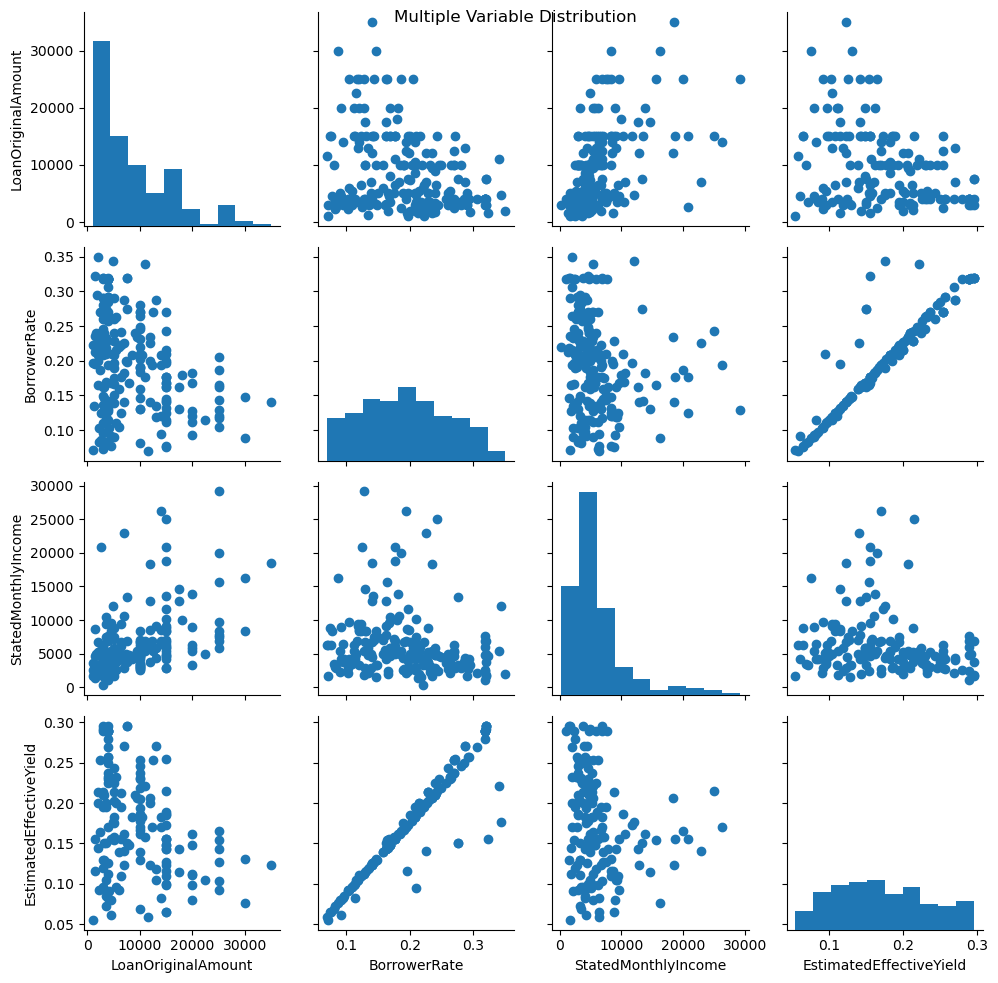

In [288]:
loan_df_var = ['LoanOriginalAmount', 'BorrowerRate', 'StatedMonthlyIncome', 'EstimatedEffectiveYield']
pair_grid = sns.PairGrid(data=loan_df_subset, vars=loan_df_var);
pair_grid.fig.suptitle('Multiple Variable Distribution')
pair_grid.map_offdiag(plt.scatter)
pair_grid.map_diag(plt.hist);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Exploring interest rate and loan amount, it is observed that higher interest rates are common with lower loan amount. Which means low income earners or "poor people" tend to pay more on their loans since they can not secure higher amounts when compared to relatively rich people

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The distribution of ProsperRating across the Income Range is almost synmetrical. Prosper has customers across and levels of ratings there seems to be a balanced distribution of ratings across.

## Multivariate Exploration

> How does borrower rating relate to interest rate and loan amount?

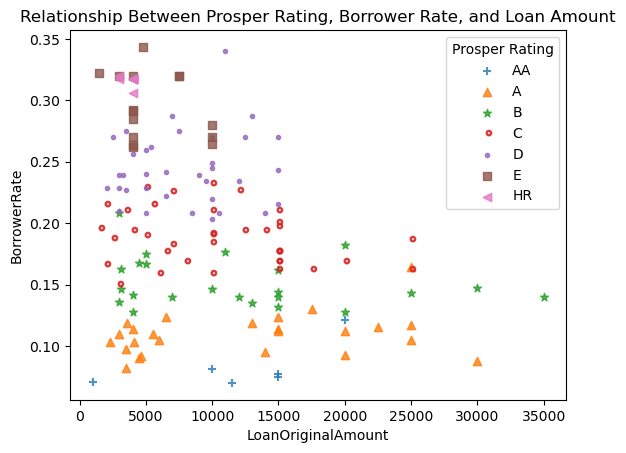

In [290]:
marker_types=[['AA','+'], ['A', '^'], ['B','*'], ['C','$\circ$'], ['D','.'], ['E',','], ['HR','<']]
for category, mark in marker_types:
    current_data= loan_df_subset.loc[loan_df_subset['ProsperRating (Alpha)'] == category]
    sns.regplot(data=current_data, y='BorrowerRate', x='LoanOriginalAmount', fit_reg = False, marker=mark)
plt.title('Relationship Between Prosper Rating, Borrower Rate, and Loan Amount')
plt.legend(['AA','A','B','C','D','E','HR'], title='Prosper Rating');

> Majority of people that enjoyed low interest rate and can obtain high loan amount have Prosper rating of either AA, A, or B which are the top 3 ratings available to customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The distribution of ProsperRating across the Income Range is almost synmetrical. Prosper has customers across and levels of ratings there seems to be a balanced distribution of ratings across.

>We can say as a matter of fact that 14.9% of booked loans are either chargedoff or defaulted. This level of loss is significant and we need to explore responsible variable further.

### Were there any interesting or surprising interactions between features?

> Majority of people that enjoyed low interest rate and can obtain high loan amount have Prosper rating of either AA, A, or B which are the top 3 ratings available to customers.

## Conclusions
>We have establish that BorrowerAPR is at least directly influenced by Prosper Rating significantly. To get good interest rate on a loan, you need to have good ratings with Prosper. People's income also determines how much money they can access with Prosper.
